# Visualizing Fire Scars from the Palisades and Eaton Fires Using False Color Imagery
**Author:** Vedika Shirtekar

**Repository:** https://github.com/vedikaS-byte/eds220-hwk4

## About

### Purpose
In January 2025, Los Angeles County experienced two catastrophic fires: the Eaton and Palisades Fires. Each fire burned nearly 10,000 acres and forced thousands of residents to evacuate (Neuman, 2025). Strong Santa Ana winds intensified the fires, complicating containment efforts, as the flames not only funneled through mountain passes but also spread over ridges and into surrounding basins (Neuman, 2025). The fires caused widespread displacement, killed at least 28 people, destroyed over 16,000 structures, and inflicted significant ecological damage (Phillips, 2025).


This assignment focuses on applying geospatial analysis and working with environmental datasets using Python libraries such as `geopandas` and `xarray`, as well as reassigning geospatial information to a spatial object for accurate georeferencing. A false color image of the Eaton and Palisades Fires was generated from remote sensing data to emphasize the fire scars and illustrate how coding and data visualization can aid environmental monitoring. 

### Highlights
Three key highlights of this coding excersise are included below: 

- **Remote sensing allows for quantitative and spatial mapping of fire impact, and false color imagery provides detailed insight into vegetation changes.** In this analysis, Python tools such as `xarray` and `geopandas` were used to process satellite raster data, identifying fire-scar perimeters and producing a map that show the extent of burned areas. By creating true color and false color images from selecting different spectral band types, burned areas are clearly distinguished from healthy vegetation, providing precise spatial context and a deeper understanding of affected landscapes (Earth Observatory, 2025).


- **The coordinate reference system (CRS) is important when handling and mapping multiple geospatial objects to ensure accurate spatial analysis**. When combining multiple geospatial datasets (ex. fire perimeters and satellite imagery), having consistent CRS prevents misalignment, ensures correct distance and area measurements, and allows layers to overlay properly on maps.


- **Geospatial information can be assigned to an object using a spatial reference.** In this analysis, the EPSG code embedded in the `.spatial_ref.crs_wkt` output was identified and used to properly assign and (if needed) reproject the dataset.

### Data Description
This analysis utilized two datasets. The first consists of a streamlined set of spectral bands (red, green, blue, near-infrared, and shortwave infrared) derived from the Landsat Collection 2 Level-2 surface reflectance data, which was atmospherically corrected and captured by the Landsat 8 satellite.The dataset was obtained from the [Microsoft Planetary Computer](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2) catalog and cropped to the region encompassing the fire perimeters. It is purely intended for visualization and educational use and is accessible as `landsat8-2025-02-23-palisades-eaton.nc` through the shared resources for the EDS 220 course.




The second dataset contains fire perimeters for the Palisades and Eaton fires. Geospatial layers containing dissolved fire perimeters/boundaries (shapefiles) for Eaton and Palisades fires were downloaded from the [County of Los Angeles Enterprise GIS](https://egis-lacounty.hub.arcgis.com/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about). It is noted in the data summary that the original NIFC FIRIS fire service contained daily captures of fire perimeters and were thus dissolved from boundary polygons to create a single fire burn perimeter for each fire (County of Los Angeles, 2025).

### Data References

Bren School of Environmental Science and Management. (2025). *landsat8-2025-02-23-palisades-eaton.nc* [Dataset]. Accessed November 20, 2025, from https://drive.google.com/drive/u/1/folders/1USqhiMLyN8GE05B8WJmHabviJGnmAsLP



County of Los Angeles Enterprise GIS. (2025). *Palisades and Eaton Dissolved Fire Perimeters (2025)* [Dataset]. County of Los Angeles. Accessed November 20, 2025, from 
https://egis-lacounty.hub.arcgis.com/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about







Microsoft Planetary Computer. (n.d.). *Landsat Collection 2 Level-2*. Accessed November 20, 2025, from https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2


## Final Output
The following shows the finalized map illustrating the extent of each fire in LA County durinng January 2025.

![False Color Map of LA fires](fire_map.png)


## Import and Read in Data

Import the neccessary libraries and read in each fire perimeter. 

In [28]:
# Import necessary libraries along with defined abbreviations
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd 
import xarray as xr
import matplotlib.patches as mpatches

In [29]:
# Set up display options when looking at data frames
pd.set_option("display.max.columns", None)

## Import the fire perimeters

# Establish file path to read in eaton shapefile
eaton_fp = os.path.join("data", "Eaton_Perimeter_20250121", "Eaton_Perimeter_20250121.shp")
eaton = gpd.read_file(eaton_fp)

# Establish file path to read in palisades shapefile
palisades_fp = os.path.join("data", "Palisades_Perimeter_20250121", "Palisades_Perimeter_20250121.shp")
palisades = gpd.read_file(palisades_fp)

## Section 2: Fire Perimeter Data Exploration
This section covers the loading and exploration of each fire perimeter shapefile, along with a brief description of key dataset characteristics, including the CRS and whether the data are in a projected coordinate system.

In ***separate subsections*** for each fire: 

a. Extract the fire perimeter data to identify key components of data exploration. 

b. Identify the CRS and confirm whether the data are in a projected or geographic format. Each fire should be explored individually, with findings presented in separate subsections.

**Include a summary of key findings at the end of each subsection.**

#### Exploring the Eaton Fire Shapefile

In [30]:
# Check the first few rows 
eaton.head()

,OBJECTID,type,Shape__Are,Shape__Len,geometry
0,1,Heat Perimeter,2206.265625,270.199719,"POLYGON ((-13146936.686 4051222.067, -13146932..."
1,2,Heat Perimeter,20710.207031,839.204218,"POLYGON ((-13150835.463 4052713.929, -13150831..."
2,3,Heat Perimeter,3639.238281,250.304502,"POLYGON ((-13153094.697 4053057.596, -13153113..."
3,4,Heat Perimeter,1464.550781,148.106792,"POLYGON ((-13145097.740 4053118.235, -13145100..."
4,5,Heat Perimeter,4132.753906,247.960744,"POLYGON ((-13153131.126 4053196.882, -13153131..."


In [31]:
# Explore data types, dimensions, and additional attributes
eaton.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    20 non-null     int64   
 1   type        20 non-null     object  
 2   Shape__Are  20 non-null     float64 
 3   Shape__Len  20 non-null     float64 
 4   geometry    20 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 932.0+ bytes


In [32]:
# Check the projected CRS
print(f"The CRS of the Eaton Fires shapefile is {eaton.crs.name} ({eaton.crs}).")

The CRS of the Eaton Fires shapefile is WGS 84 / Pseudo-Mercator (EPSG:3857).


In [33]:
# Check for whether Eaton shapefile is projected or geographic
print(f"Is the Eaton fire perimeter projected:", {eaton.crs.is_projected})

Is the Eaton fire perimeter projected: {True}


Text(0.5, 1.0, 'Eaton Fire Perimeter')

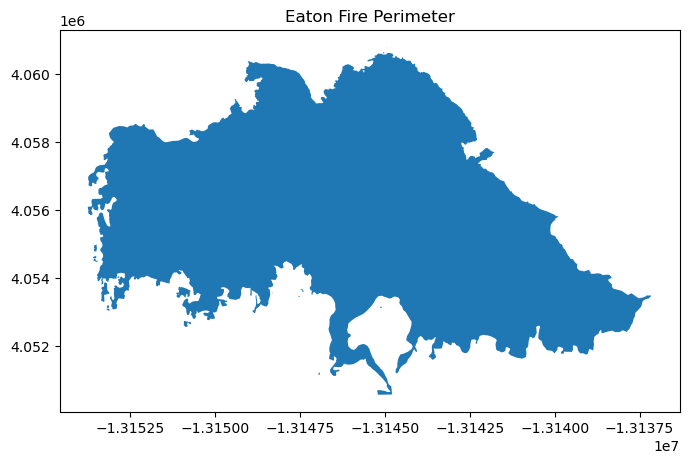

In [34]:
# OPTIONAL: Visualize Eaton fire extent 
ax = eaton.plot(figsize=(8, 8))
ax.set_title("Eaton Fire Perimeter")

The `eaton` fire perimeter dataset includes five attributes: `OBJECTID`, `type`, `Shape__Are`, `Shape__Len`, and a `geometry`. The `OBJECTID` variable is stored as an `int64`, `type` appears as an `object` (likely a string), and both `Shape__Are` and `Shape__Len` are represented as `float64` values, while the `geometry` column stores spatial features. All 20 records are complete with no missing values observed. The `eaton` shapefile, loaded as a `geopandas GeoDataFrame`, is projected and is stored in the WGS 84 / Pseudo-Mercator CRS, identified by EPSG code 3857. 

#### Exploring the Palisades Fire Shapefile

In [35]:
# Check the first few rows 
palisades.head()

,OBJECTID,type,Shape__Are,Shape__Len,geometry
0,1,Heat Perimeter,1182.082031,267.101144,"POLYGON ((-13193543.302 4032913.077, -13193543..."
1,2,Heat Perimeter,2222.488281,185.498783,"POLYGON ((-13193524.155 4033067.953, -13193524..."
2,3,Heat Perimeter,21.011719,22.412814,"POLYGON ((-13193598.085 4033158.222, -13193598..."
3,4,Heat Perimeter,214.992188,76.639180,"POLYGON ((-13193654.249 4033146.033, -13193656..."
4,5,Heat Perimeter,44203.453125,1569.259764,"POLYGON ((-13194209.580 4033236.320, -13194209..."


In [36]:
# Explore data types, dimensions, and additional attributes
palisades.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    21 non-null     int64   
 1   type        21 non-null     object  
 2   Shape__Are  21 non-null     float64 
 3   Shape__Len  21 non-null     float64 
 4   geometry    21 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 972.0+ bytes


In [37]:
# Check the projected CRS
print(f"The CRS of the Palisades Fires shapefile is {palisades.crs.name} ({palisades.crs}).")

The CRS of the Palisades Fires shapefile is WGS 84 / Pseudo-Mercator (EPSG:3857).


In [38]:
# Check for whether Palisades shapefile is projected or geographic
print(f"Is the Palisades fire perimeter projected:", {palisades.crs.is_projected})

Is the Palisades fire perimeter projected: {True}


Text(0.5, 1.0, 'Palisades Fire Perimeter')

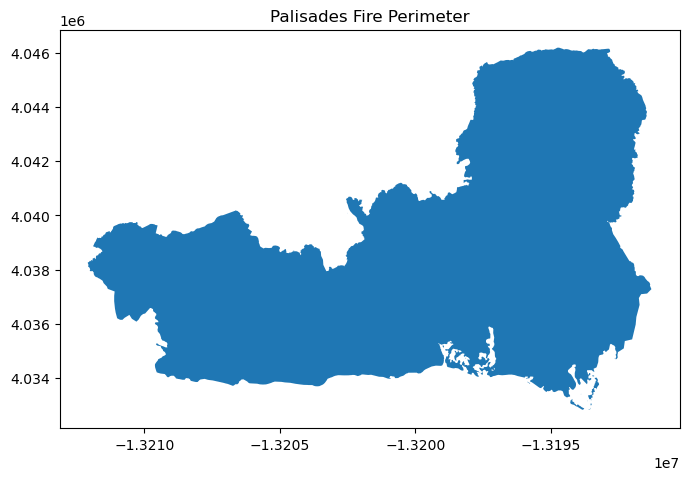

In [39]:
# OPTIONAL: Visualize Palisades fire extent 
ax = palisades.plot(figsize=(8, 8))
ax.set_title("Palisades Fire Perimeter")

The `palisades` fire perimeter dataset includes five attributes: `OBJECTID`, `type`, `Shape__Are`, `Shape__Len`, and a `geometry`. The `OBJECTID` variable is stored as an `int64`, `type` appears as an `object` (likely a string), and both `Shape__Are` and `Shape__Len` are represented as `float64` values, while the `geometry` column stores spatial features. All 21 records are complete with no missing values observed. The `palisades` shapefile, loaded as a `geopandas GeoDataFrame`, is projected and stored in the WGS 84 / Pseudo-Mercator CRS, identified by EPSG code 3857. 

## Section 3: NetCDF Data Import and Exploration
This section covers the loading and exploration of the NetCDF (`landsat8-2025-02-23-palisades-eaton.nc`), along with a brief description of key dataset characteristics such as the variables, dimensions, and coordinates. 

When working outside of the Workbench environment, the EDS-220 conda environment should be updated prior to reading the NetCDF file. The instructions below outline the required terminal commands.
 
 In the terminal: 
 
a. Install the `netCDF4` package in the EDS 220 environment by running: `conda install -c conda-forge netcdf4`.

b. Verify that the `netcdf4` package was installed.

After confirming that the `netcdf4` package is successfully installed in the updated EDS 220 environment, the data exploration process can begin.

a. Read in the NetCDF (`landsat8-2025-02-23-palisades-eaton.nc`). 

In [40]:
# Read in and open landsat data 
palisades_eaton = xr.open_dataset("data/landsat8-2025-02-23-palisades-eaton.nc")

b. Explore and briefly describe the data’s variables, dimensions, and coordinates. 

In [41]:
# Observe variables as well as their attributes and dimensions
palisades_eaton

<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...
    spatial_ref  int64 8B ...

In [42]:
# Extract the variable data types (dictionary used for visual reference)
print(f"Variable data types: {dict(palisades_eaton.dtypes)}")

Variable data types: {'red': dtype('float32'), 'green': dtype('float32'), 'blue': dtype('float32'), 'nir08': dtype('float32'), 'swir22': dtype('float32'), 'spatial_ref': dtype('int64')}


In [43]:
# Extract the dimensions (dictionary used for visual reference)
print(f"Dimensions: {dict(palisades_eaton.sizes)}")

Dimensions: {'y': 1418, 'x': 2742}


In [44]:
# Identify the min and max coordinate for each dimension to obtain only one coordinate each

# Print the coordinates for x
print("Coordinates x min:", palisades_eaton['x'].min().values)
print("Coordinates x max:", palisades_eaton['x'].max().values)

# Print the coordinates for y
print("Coordinates y min:", palisades_eaton['y'].min().values)
print("Coordinates y max:", palisades_eaton['y'].max().values)

# Print the coordinates for time
print("Coordinates time min:", palisades_eaton['time'].min().values)
print("Coordinates time max:", palisades_eaton['time'].max().values)

Coordinates x min: 334410.0
Coordinates x max: 416640.0
Coordinates y min: 3756540.0
Coordinates y max: 3799050.0
Coordinates time min: 2025-02-23T18:28:13.651369000
Coordinates time max: 2025-02-23T18:28:13.651369000


The netCDF palisades_eaton, read in as an `xarray.core.dataset.Dataset`, contains five variables observed from the raw output: `red`, `green`, `blue`, `nir08`, `swir22`, and `spatial_ref`. All color bands are stored as `float32` types while `spatial_ref` is an `int64` type. `palisades_eaton` is structured as a two-dimensional grid with dimensions of 1418 (y) by 2742 (x). The x coordinates span 334,410 to 416,640 units and the y coordinates from 3,756,540 to 3,799,050 units. The temporal coordinate shows a single time of 2025-02-23T18:28:13.651369000.

## Section 4: Restoring Geospatial Information to the NetCDF
In this section, geospatial and spatial information regarding the CRS of the netCDF `palisades_eaton` is restored for continued analysis in later sections.

a. Use the `rio.crs` attribute to display the CRS of the NetCDF dataset. In a separate markdown cell, note whether any output is produced and indicate if the dataset is classified as a geospatial object.

In [45]:
# Call rio.crs on palisades_eaton
palisades_eaton.rio.crs

In [46]:
# Print statement for checking type of palisades_eaton object
print(f"palisades_eaton is a {type(palisades_eaton)} object.")

palisades_eaton is a <class 'xarray.core.dataset.Dataset'> object.


`palisades_eaton` is a not currently a geospatial object in the `rioxarray` sense; it is a `xarray.core.dataset.Dataset` type and lacks a CRS for georeference (indicated by no output from `rio.crs`) despite having a spatial reference. 

b. Print the CRS of the `spatial_ref` using the `spatial_ref.crs_wkt attribute` of the dataset to access the geospatial information of `palisades_eaton`.

In [47]:
# Call spatial_red.crs_wkt on netCDF to access geospatial reference information
palisades_eaton.spatial_ref.crs_wkt

'PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]'

c. Using `rio.write_crs()`, recover the geospatial information and the spatial reference information from part b for the dataset's CRS. The EPSG code is the last argument structurally encoded in part b. 

In [48]:
# Assign the EPSG:32611 (last argument structurally encoded in part b) CRS to palisades_eaton
palisades_eaton = palisades_eaton.rio.write_crs(32611, inplace = True)

d. Print the CRS of the updated dataset to ensure there is an assigned CRS. 

In [49]:
# Print CRS of palisades_eaton
palisades_eaton.rio.crs

CRS.from_epsg(32611)

## Section 5: Creating a True Color Image
True color and false color images can be generated by combining different spectral bands from the NetCDF dataset. In this case, an RGB image is created using method chaining, which streamlines selecting the appropriate bands and plotting them, while also allowing adjustments to handle outliers and missing values for accurate visualization.

a. Use method chaining to select the red, green, and blue bands (in that order), convert them to an array with `.to_array()`, and plot an RGB image using `.plot.imshow()`. Ignore any warnings for now, as they will be handled in the proceeding steps.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


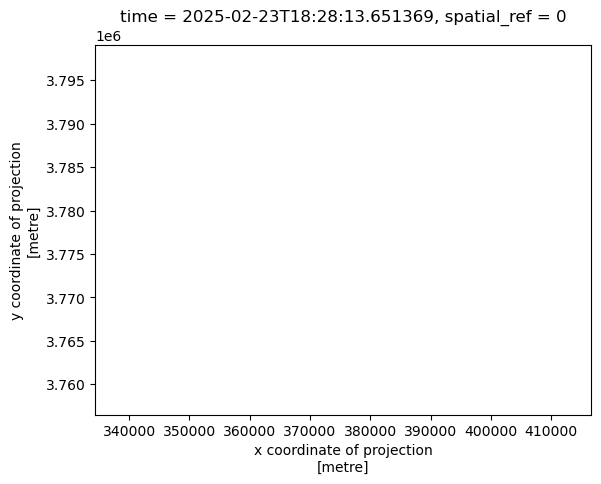

In [50]:
# Method chaining of band selection and array conversion with expected warning(s)
palisades_eaton[["red", "green","blue"]].to_array().plot.imshow()

b. Identify which bands contain NaN values. 

In [51]:
# Call isnull() to check for which bands have missing values in both x and y coordinates of each band
palisades_eaton.isnull().any(dim=["x", "y"])

<xarray.Dataset> Size: 21B
Dimensions:      ()
Coordinates:
    time         datetime64[ns] 8B 2025-02-23T18:28:13.651369
    spatial_ref  int64 8B 0
Data variables:
    red          bool 1B False
    green        bool 1B True
    blue         bool 1B True
    nir08        bool 1B False
    swir22       bool 1B False

c. Apply `.fillna(0)` using method chaining to replace all missing values with zeros, then plot the RGB image with `robust=True` to handle outliers (like clouds) and generate a clean true color image.

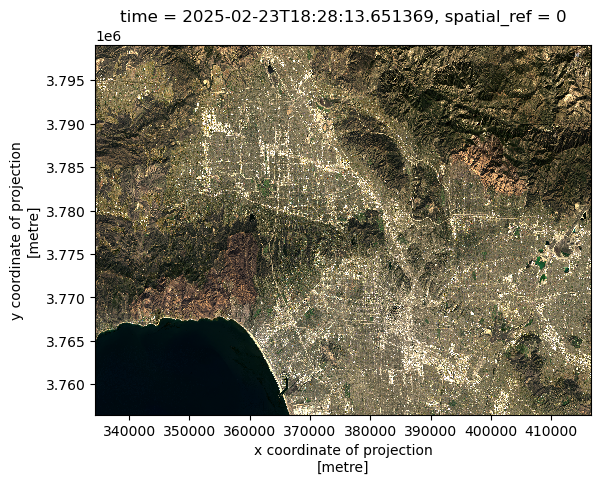

In [52]:
# Include `robust` set to true to produce a clean rgb image with no cloud cover
palisades_eaton[["red", "green","blue"]].to_array().fillna(0).plot.imshow(robust = True)

d. In a markdown cell below, write a brief explanation comparing the ouputs for parts (a) and (c).

In part (a), plotting the array of spectral bands did not produce a true color image. This was likely due to NaN values present in the green and blue bands. After replacing missing values with 0 using `.fillna(0)` and adjusting for outliers such as clouds using `robust = True` in part (c), a true color image was successfully generated showing the burn scars of each fire, as indicated by differences in vegetation in the affected areas.

## Section 6: Creating a False Color Image
Similarly to Section 5, a false color image can be created by selecting the short-wave infrared (`swir22`), near-infrared (`nir08`), and red bands. This combination of spectral bands provides an alternative view that highlights the extent of burns caused by the fires in the county, making differences in vegetation and affected areas easily distinguishable compared to the true color image.

Create a false color image of the Palisades and Eaton Fires by plotting the short-wave infrared (`swir22`), near-infrared (`nir08`), and red variables (in that order) in a single line of code. 

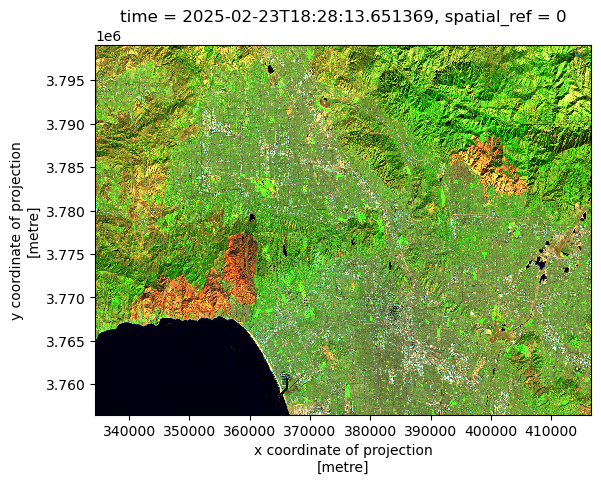

In [53]:
# Plot false color image with method chaining and accounting for empty values
palisades_eaton[["swir22", "nir08","blue"]].to_array().fillna(0).plot.imshow(robust = True)

## Section 7: Visualizing the Extent of Burns
The final part of this analysis focuses on creating a map using the shortwave infrared/near-infrared/red false color image. A brief figure description for the produced map was included to explain how the false color imagery highlights features such as vegetation differences and burned areas.

a. Ensure that the CRS of all geospatial objects match prior to plotting using assert tests and CRS transformations.

In [54]:
# Create assert tests to check whether corresponding geospatial objects have matching CRS
assert palisades.crs == palisades_eaton.rio.crs, "Palisades shapefile and Landsat imagery do NOT having matching CRS."
assert eaton.crs == palisades_eaton.rio.crs, "Eaton shapefile and Landsat imagery do NOT having matching CRS."

AssertionError: Palisades shapefile and Landsat imagery do NOT having matching CRS.

In [55]:
# Landsat CRS is the reference CRS used for transformation
crs_raster = palisades_eaton.rio.crs

# Transform to match CRS reference
if palisades.crs != crs_raster: 
    palisades = palisades.to_crs(crs_raster)

# Transform to match CRS reference
if eaton.crs != crs_raster: 
    eaton = eaton.to_crs(crs_raster)

b. Create a map showing the false color image overlaid with both fire perimeters, and include a clear title and legend. Make sure to indicate each fire by adding a legend. 

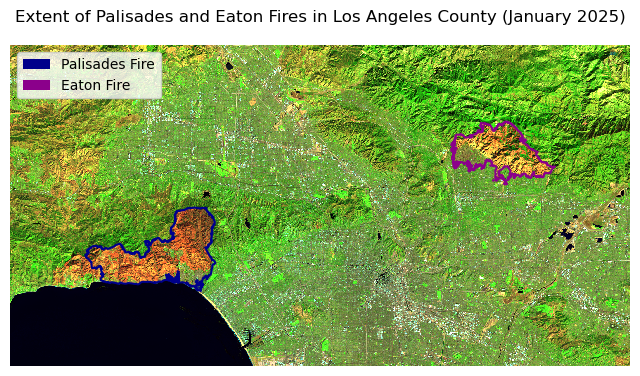

In [56]:
# Establish figure and axis
fig, ax = plt.subplots(figsize = (8,10))

# Define bands of interest
bands = palisades_eaton[["swir22", "nir08","blue"]].to_array().fillna(0)

bands.plot.imshow(
    ax = ax, # Assign axis
    robust = True # No cloud cover
    ) 

# Manually create patches for referencing fire perimeter in legend 
palisades_patch = mpatches.Patch(facecolor = "darkblue", # Define border color (fill for patch)
                                 label = "Palisades Fire") # Label reference

eaton_patch = mpatches.Patch(facecolor = "darkmagenta", # Define border color (fill for patch)
                             label = "Eaton Fire") # Label reference

# Plot each fire perimeter with same facecolor and edgecolor as associated patch
palisades.plot(ax = ax, # Reassign axis
               facecolor = "none", # No fill color
               edgecolor = "darkblue", # Border color
               label = "Palisades Fire", # Label
               linewidth= 1.5) # Adjust border thickness

eaton.plot(ax = ax, 
           facecolor = "none", # No fill color
           edgecolor = "darkmagenta", # Border color
           label = "Eaton Fire", # Label
           linewidth = 1.5) # Adjust border thickness

# Add legend 
ax.legend( handles = [palisades_patch, eaton_patch], # Pass list of patches for each fire perimeter
          loc = "upper left") # Define location for legend

# Set a title
ax.set_title("Extent of Palisades and Eaton Fires in Los Angeles County (January 2025)")

# Turn axis off for readability
ax.set_axis_off()

# Save figure for reference in final output
fig.savefig("fire_map.png", # File name
            bbox_inches = "tight") # Adjust margins to remove whitespace
# Show plot
plt.show()

The produced map highlights the significant impact of the Palisades and Eaton Fires on vegetation density. In the burned areas, an orange coloration clearly contrasts with the surrounding greenery, indicating that the fires heavily affected forested regions. The Palisades Fire appears to have burned a larger area than the Eaton Fire, with more extensive vegetation loss within its perimeter. Additionally, the Palisades Fire is situated closer to the coast and urban areas, suggesting a potentially greater direct impact on people, though the Eaton Fire also affected populated regions.

The false color imagery uses the shortwave infrared (SWIR), near-infrared (NIR), and red bands to enhance contrasts in vegetation. For instance, mountainous areas outside the fire perimeters appear as dense light green, while urban regions are represented by clusters of white, likely indicating building presence. Within each fire perimeter, reduced vegetation density is highlighted in orange, clearly outlining burned areas from the surrounding greener regions.